<a href="https://colab.research.google.com/github/ChaaruVijay/DSPL-CourseWork/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
df=pd.read_csv('train_cleaned.csv')

In [ ]:
target_col='cluster_catgeory'
y=df[target_col]
X=df.drop(columns=[target_col])

In [ ]:
# (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Evaluate Classification Model
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

         1.0       0.95      0.93      0.94     56688
         2.0       0.92      0.92      0.92     46515
         3.0       0.78      0.86      0.82     14667
         4.0       0.93      0.95      0.94     51728
         5.0       0.80      0.70      0.74     11857
         6.0       0.93      0.92      0.92     50762

    accuracy                           0.92    232217
   macro avg       0.88      0.88      0.88    232217
weighted avg       0.92      0.92      0.92    232217

Confusion Matrix:
 [[52843     2     2  3839     1     1]
 [    0 42794     2     2     2  3715]
 [    1     1 12599     1  2064     1]
 [ 2536     0     5 49184     3     0]
 [    1     0  3608     2  8244     2]
 [    0  3877     4     4     2 46875]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE  # Handle class imbalance

#  SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


param_dist = {
    'n_estimators': [10, 20, 30],
    'max_depth': [3, 5, 7],
    'min_samples_split': [50, 100],
    'min_samples_leaf': [20, 30],
    'criterion': ['gini'],
    'max_features': ['sqrt', 'log2'],
    'ccp_alpha': [0.01, 0.05, 0.1]
}

# StratifiedKFold to maintain class distribution
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
rf_rscv = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),  # Adjust weights for imbalance
    param_distributions=param_dist,
    n_iter=10,
    cv=cv_strategy,
    scoring='balanced_accuracy',
    n_jobs=-1,
    verbose=1
)

In [ ]:
rf_rscv.fit(X_train, y_train)
print("Best Parameters:", rf_rscv.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 30, 'min_samples_split': 50, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'max_depth': 7, 'criterion': 'gini', 'ccp_alpha': 0.01}


In [ ]:
best_model= rf_rscv.best_estimator_
y_pred_rf = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_best = accuracy_score(y_test, y_pred_rf)
print(f"Best Model Accuracy: {accuracy_best * 100:.2f}%")

Best Model Accuracy: 91.45%


In [ ]:
# Evaluate model
y_pred_rf = best_model.predict(X_test)
print("Optimized Classification Report:\n", classification_report(y_test, y_pred_rf))

Optimized Classification Report:
               precision    recall  f1-score   support

         1.0       0.98      0.91      0.94     56688
         2.0       0.90      0.94      0.92     46515
         3.0       0.78      0.86      0.81     14667
         4.0       0.91      0.98      0.94     51728
         5.0       0.79      0.69      0.74     11857
         6.0       0.94      0.90      0.92     50762

    accuracy                           0.91    232217
   macro avg       0.88      0.88      0.88    232217
weighted avg       0.92      0.91      0.91    232217



In [ ]:
rf_best = rf_rscv.best_estimator_

In [ ]:
print(rf_rscv.best_params_)

{'n_estimators': 30, 'min_samples_split': 50, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'max_depth': 7, 'criterion': 'gini', 'ccp_alpha': 0.01}


In [ ]:
#prediction on the test data
y_pred_rf = rf_best.predict(X_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix for RF


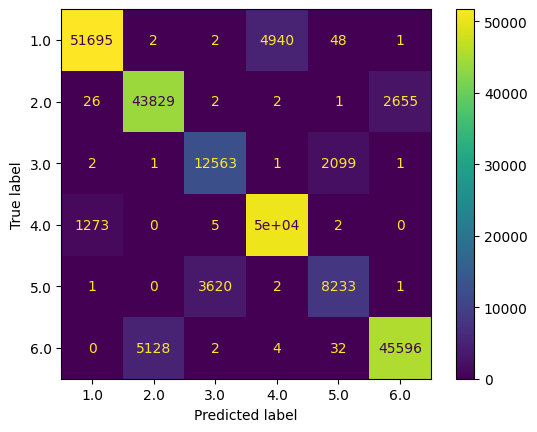

In [ ]:
print("confusion_matrix for RF")
rf_cm=confusion_matrix(y_test,y_pred_rf)
disp=ConfusionMatrixDisplay(confusion_matrix=rf_cm,display_labels = rf_best.classes_)
disp.plot()

In [ ]:
from sklearn.model_selection import learning_curve
# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1
)

# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

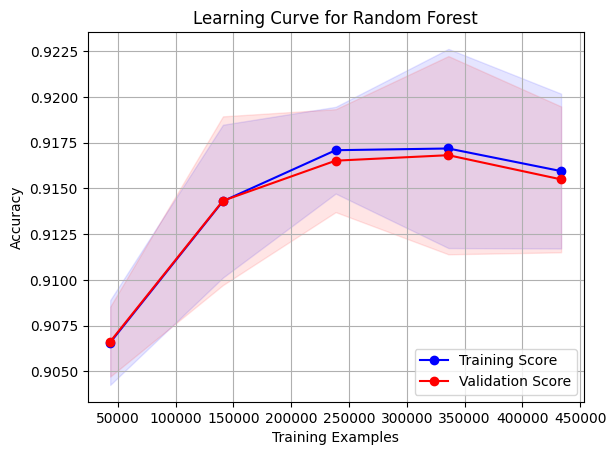

In [ ]:
# Plot training accuracy
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
# Plot validation accuracy
plt.plot(train_sizes, test_mean, 'o-', color="red", label="Validation Score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Train Accuracy
train_accuracy = accuracy_score(y_train, rf_best.predict(X_train))
print(f"Train Accuracy: {train_accuracy:.4f}")

# Test Accuracy
test_accuracy = accuracy_score(y_test, rf_best.predict(X_test))
print(f"Test Accuracy: {test_accuracy:.4f}")


Train Accuracy: 0.9149
Test Accuracy: 0.9145


In [ ]:
# Feature Importance
importances = rf_best.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance_df)

Feature Importance:
         Feature  Importance
3     dry_sales    0.307899
2   fresh_sales    0.306039
1  luxury_sales    0.251206
0   outlet_city    0.134857


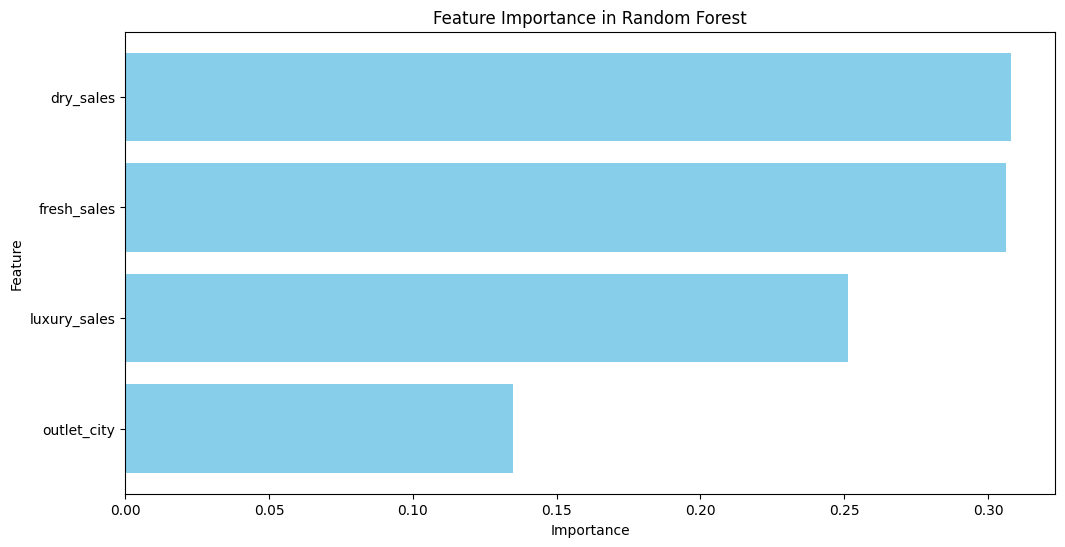

In [ ]:
# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()

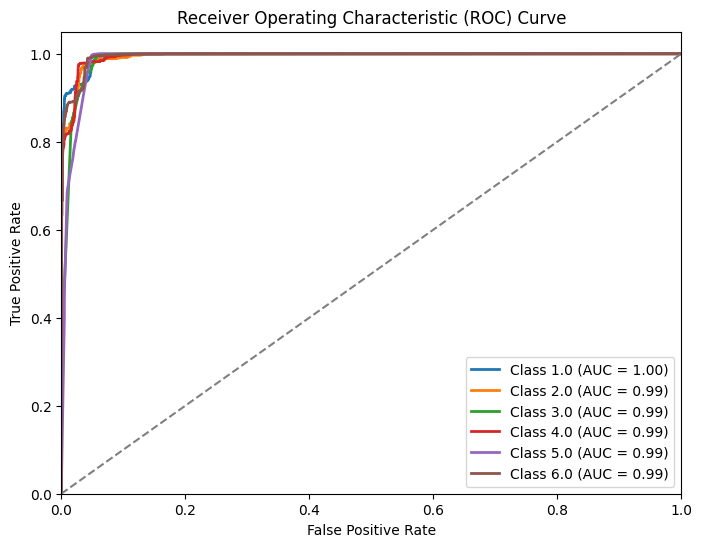

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the target variable for multiclass ROC
y_test_bin = label_binarize(y_test, classes=rf_rscv.classes_)
y_pred_prob = rf_rscv.best_estimator_.predict_proba(X_test)

# Calculate and plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {rf_rscv.classes_[i]} (AUC = {roc_auc:.2f})')

# Plot chance level (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
print(comparison_df.head(10))

        Actual  Predicted
136482     4.0        4.0
466661     1.0        1.0
81511      4.0        4.0
687267     6.0        6.0
377685     1.0        1.0
340981     5.0        3.0
541965     1.0        1.0
99845      4.0        4.0
332401     5.0        5.0
514841     1.0        4.0
